##  <u> ARTIFICIAL   NEURAL  NETWORK </u>

EXAMPLE WITH A DIAGRAM

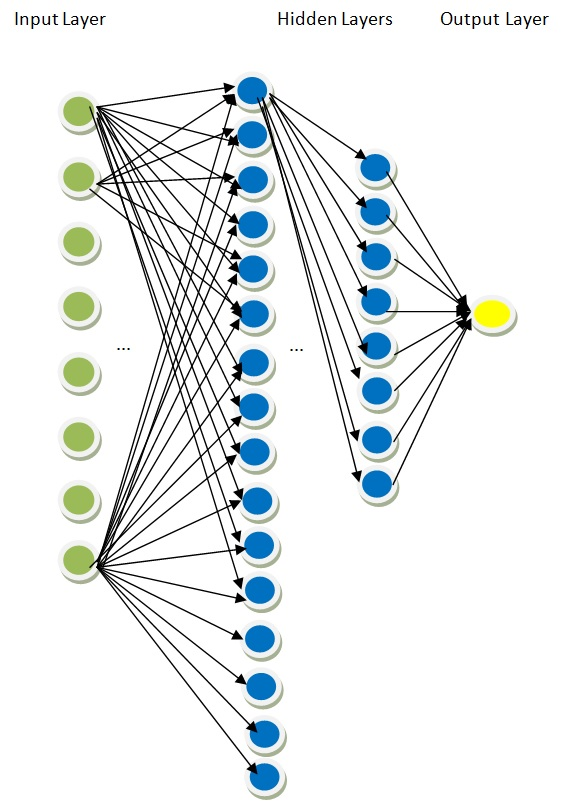

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
diabetes = pd.read_csv("C:/Users/HP/Desktop/Upgrad Case Study/Pima_Diabetes/archive/diabetes.csv")
diabetes.head(4)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [5]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Rescaling the Features

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

diabetes[num_vars] = scaler.fit_transform(diabetes[num_vars])

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [10]:
## Checking for Outliers

In [11]:
# Checking for outliers in the continuous variables
num_diabetes = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [12]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_diabetes.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
90%,0.529412,0.839196,0.721311,0.404040,0.248227,0.618480,0.341845,0.500000,1.000000
95%,0.588235,0.909548,0.737705,0.444444,0.346336,0.661624,0.450406,0.616667,1.000000
99%,0.764706,0.984925,0.868852,0.518485,0.614539,0.756468,0.691857,0.766667,1.000000


In [13]:
Q1 = num_diabetes.quantile(0.25)
Q3 = num_diabetes.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                 0.294118
Glucose                     0.207286
BloodPressure               0.147541
SkinThickness               0.323232
Insulin                     0.150414
BMI                         0.138599
DiabetesPedigreeFunction    0.163322
Age                         0.283333
Outcome                     1.000000
dtype: float64


In [14]:
### Quantile-based Flooring and Capping

In [15]:
print(diabetes.quantile(0.05))
print(diabetes.quantile(0.95))

Pregnancies                 0.000000
Glucose                     0.396985
BloodPressure               0.317213
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.324888
DiabetesPedigreeFunction    0.026623
Age                         0.000000
Outcome                     0.000000
Name: 0.05, dtype: float64
Pregnancies                 0.588235
Glucose                     0.909548
BloodPressure               0.737705
SkinThickness               0.444444
Insulin                     0.346336
BMI                         0.661624
DiabetesPedigreeFunction    0.450406
Age                         0.616667
Outcome                     1.000000
Name: 0.95, dtype: float64


In [16]:
diabetes = diabetes[~((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]
print(diabetes.shape)

(639, 9)


In [17]:
### Test-Train Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,0.183333,1.0


In [20]:
# Putting feature variable to X
X = diabetes.drop(['Outcome'], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000


In [21]:
# Putting response variable to y
y = diabetes['Outcome']
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
5    0.0
Name: Outcome, dtype: float64

##### Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [23]:
print(model.feature_importances_)

[0.1108686  0.2350268  0.10242873 0.07843035 0.07138603 0.13449756
 0.12241234 0.1449496 ]


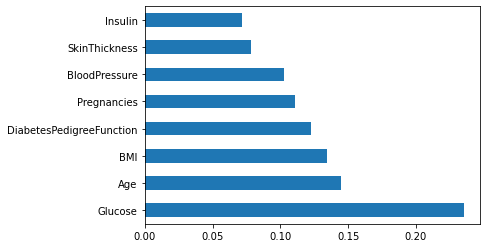

In [24]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation

In [25]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


<AxesSubplot:>

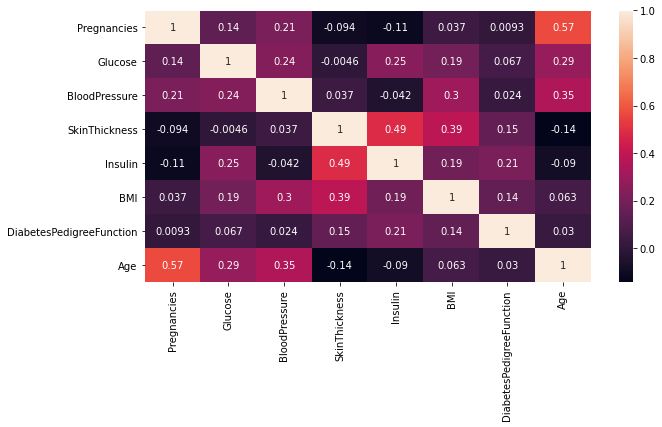

In [26]:
import seaborn as sns
corr=diabetes.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(10,5))
sns.heatmap(diabetes[top_features].corr(),annot=True)


#### Remove The correlated

In [27]:
threshold=0.5

In [28]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
correlation(diabetes.iloc[:,:-1],threshold)

{'Age'}

#### Information Gain

In [30]:
from sklearn.feature_selection import mutual_info_classif

In [31]:
mutual_info=mutual_info_classif(X,y)

In [32]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)


Glucose                     0.126210
Age                         0.067254
BMI                         0.056568
Pregnancies                 0.037351
Insulin                     0.034195
BloodPressure               0.000000
SkinThickness               0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64

### Dropping the column with `High Correlation`

In [33]:
X = X.drop(['Age'], axis=1)

### Further Running the `ExtraTreeClassifier Algorithm` to check the Feature Importance 

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [35]:
print(model.feature_importances_)

[0.13196711 0.25596848 0.12453557 0.09346565 0.08557497 0.16610462
 0.1423836 ]


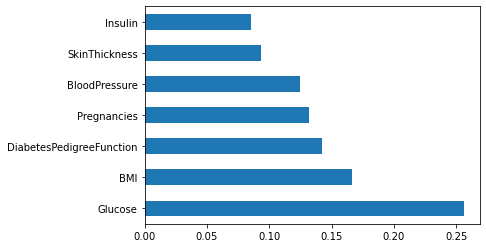

In [36]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### Let's Consider the `Top 5 Features `

In [37]:
X = X.drop(['Insulin'], axis=1)

In [38]:
X = X.drop(['SkinThickness'], axis=1)

In [39]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [40]:
y.value_counts()

0.0    439
1.0    200
Name: Outcome, dtype: int64

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(447, 5)
(192, 5)
(447,)
(192,)


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
#Standard normalization
X_train = X_train.copy()
X_train = StandardScaler().fit_transform(X_train)

X_test = X_test.copy()
X_test = StandardScaler().fit_transform(X_test)

In [45]:
#!pip install keras-tuner


In [46]:
import pandas as pd
import numpy as np 
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [49]:
# initialising sequential model and adding layers to it
# Adding the input layer and the first hidden layer
# Initialising the ANN
model = Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='LeakyReLU'))
model.add(Dense(8, activation='LeakyReLU'))
# Adding the output layer
model.add(Dense(1, activation='sigmoid'))   # this is output layer - should have as many neurons as there are outputs to the classification problem.


In [50]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 74ms/step - loss: 0.6640 - accuracy: 0.6499 - val_loss: 0.6538 - val_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6518 - accuracy: 0.6751 - val_loss: 0.6421 - val_accuracy: 0.6889
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6396 - accuracy: 0.6919 - val_loss: 0.6310 - val_accuracy: 0.6889
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6284 - accuracy: 0.6947 - val_loss: 0.6203 - val_accuracy: 0.6889
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6174 - accuracy: 0.6947 - val_loss: 0.6102 - val_accuracy: 0.6889
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6062 - accuracy: 0.6947 - val_loss: 0.6005 - val_accuracy: 0.6889
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5964 - accuracy: 0.6947 - val_loss: 0.5911 - val_accuracy: 0.6889
Epoch 8/100
4/4 [=====

In [53]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7865
[0.4671148359775543, 0.7864583134651184]


In [54]:
y_pred = model.predict(X_test)

In [55]:
y_pred = (y_pred > 0.5)

In [56]:
y_pred = [int(val) for val in y_pred]

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [58]:

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [59]:
print(cm)

[[113  16]
 [ 25  38]]


In [60]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]

In [61]:
print(score)

0.7864583333333334


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       138
           1       0.60      0.70      0.65        54

    accuracy                           0.79       192
   macro avg       0.74      0.76      0.75       192
weighted avg       0.80      0.79      0.79       192

